In [1]:
#from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
    return img

In [3]:
def show_img(img, title = None):
    plt.subplot(111)
    plt.imshow(img)
    plt.suptitle(title)
    plt.show()

In [4]:
mossy = get_image('../images/mossydeer.jpg')
nomossy = get_image('../images/nomossy.jpg')

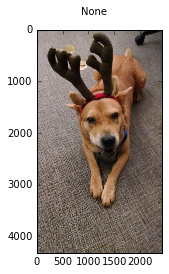

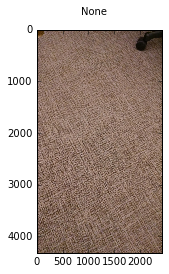

In [5]:
show_img(mossy)
show_img(nomossy)

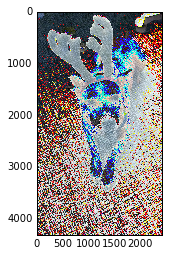

In [44]:
show_img(mossy - nomossy)

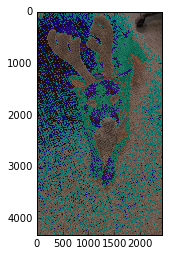

In [49]:
show_img((mossy + nomossy)/2)

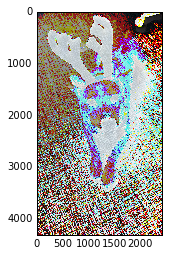

In [50]:
show_img(mossy-((mossy + nomossy)/2))

In [7]:
deer1 = get_image('../data/motion_test/EK000025-2.JPG')
deer2 = get_image('../data/motion_test/EK000026-2.JPG')
deer3 = get_image('../data/motion_test/EK000027-2.JPG')
floor_avg= (deer1+deer2+deer3)//3
avg_img = (deer1+deer2+deer3)/3
geomean = (deer1*deer2*deer3)**(1/3)

roundeer1 = np.around(deer1, -2)
rd2 = np.around(deer2, -2)
rd3 = np.around(deer3, -2)
ravg = (roundeer1 + rd2 + rd3)/3

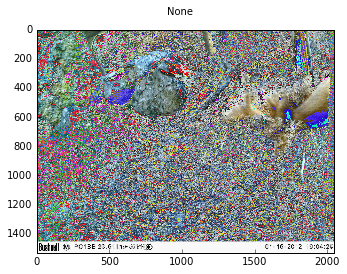

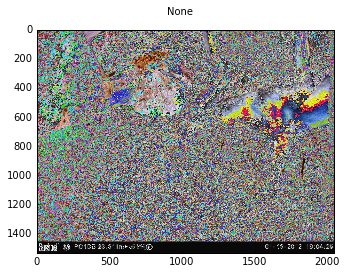

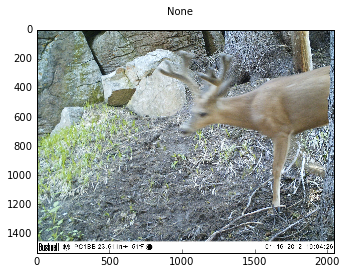

In [8]:
# show_img(deer1)
# show_img(deer2)
# show_img(deer3)

# show_img(avg_img, title = '3 Image Average')
# show_img(floor_avg, title = '3 Image floor division')

show_img(256-3*avg_img)
show_img(deer3-(256-3*avg_img))
show_img(deer3)
# show_img(geomean, title = 'geometric mean')
# show_img(deer1-floor_avg, title = 'deer1')

# show_img(ravg)
# show_img(deer1-ravg)